# Sentiment per state

In [1]:
# dependancies
import pandas as pd
import geopandas as gpd
import os
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline
from scipy.stats import chi2_contingency
from sklearn.preprocessing import MinMaxScaler


In [2]:
loc_shape_file = "../datasets/states_21basic/states.shp"
loc_twitter = "../datasets/state_sen_summary_twitter_skl.pkl"
loc_movies = "../datasets/state_sen_summary_movie_skl.pkl"
loc_state = "../datasets/state_id.pkl"
loc_shape_file = "../datasets/states_21basic/states.shp"
loc_votes_file = "../datasets/election_totals.pkl"

## Load in data
### Use loc_twitter for the twitter_sample training corpus and loc_movies for the IMDB movie training corpus

In [3]:
# Load in data
state_dataframe = gpd.read_file(loc_shape_file)

# Use loc_twitter for the twitter_sample training corpus and loc_movies for the IMDB movie training corpus
twitter_sen = pd.read_pickle(loc_movies)
state_df = pd.read_pickle(loc_state)

In [4]:
twitter_score = twitter_sen.reset_index()
twitter_score.rename(columns={'id': 'count'}, inplace=True)

In [5]:
# Count number of positive/negative tweets
def score_function(sentiment, id_count):
    if sentiment == "neg":
        return - int(id_count)
    elif sentiment == "pos":
        return int(id_count)
    else:
        return None
    

In [7]:
twitter_score["sen_score"] = [score_function(x, y) for x,y in zip(twitter_score["sentiment"],twitter_score["count"])]

In [8]:
# Sum positive and negative tweets
twitter_states = twitter_score.groupby(["Mentions", "state"]).sum()

# Create relative scores by dividing by all tweets mentioning the candidate.
clinton =  twitter_states.loc["clinton"]
clinton["clinton_sen_score"] = clinton["sen_score"] / clinton["count"]

trump =  twitter_states.loc["trump"]
trump["trump_sen_score"] = trump["sen_score"] / trump["count"]
with pd.option_context('display.max_rows', None):
    display(clinton)
    display(trump)

,count,sen_score,clinton_sen_score
state,,,
Alabama,946,-66,-0.069767
Alaska,194,-48,-0.247423
Arizona,2225,-239,-0.107416
Arkansas,615,-79,-0.128455
California,10429,-1137,-0.109023
Colorado,1665,-207,-0.124324
Connecticut,1099,-101,-0.091902
Delaware,206,-30,-0.145631
District of Columbia,667,51,0.076462


,count,sen_score,trump_sen_score
state,,,
Alabama,4033,-39,-0.009670
Alaska,680,-122,-0.179412
Arizona,7798,-536,-0.068736
Arkansas,1069,-185,-0.173059
California,29203,-4671,-0.159949
Colorado,2556,-300,-0.117371
Connecticut,2271,-377,-0.166006
Delaware,744,-156,-0.209677
District of Columbia,1649,-173,-0.104912


In [8]:
trump.sum()

count              234005.000000
sen_score          -30231.000000
trump_sen_score        -6.398455
dtype: float64

In [9]:
# Merge dataframes
tweet_counts = twitter_sen.groupby("state").sum()
tweet_counts.rename(columns={'id': 'count'}, inplace=True)
state_dataframe_tot = state_dataframe.merge(tweet_counts, left_on = "STATE_NAME", right_on = "state")
state_dataframe_c = state_dataframe_tot.merge(clinton.loc[:,"clinton_sen_score"], left_on = "STATE_NAME",
                                              right_on = "state")
state_sen_df = state_dataframe_c.merge(trump.loc[:,"trump_sen_score"], left_on = "STATE_NAME", 
                                       right_on = "state")
state_sen_df.drop(["DRAWSEQ","STATE_FIPS", "SUB_REGION", "STATE_ABBR"], axis =1, inplace = True)
state_sen_df.head()

,STATE_NAME,geometry,count,clinton_sen_score,trump_sen_score
0,Hawaii,(POLYGON ((-160.0738033454681 22.0041773479577...,1596,-0.037288,-0.005380
1,Washington,(POLYGON ((-122.4020153103835 48.2252163723779...,7520,-0.102949,-0.146232
2,Montana,POLYGON ((-111.4754253002074 44.70216236909688...,434,-0.038961,-0.042857
3,Maine,(POLYGON ((-69.77727626137293 44.0741483685119...,2583,-0.139344,-0.083532
4,North Dakota,POLYGON ((-98.73043728833767 45.93827137024809...,282,-0.093023,-0.193878


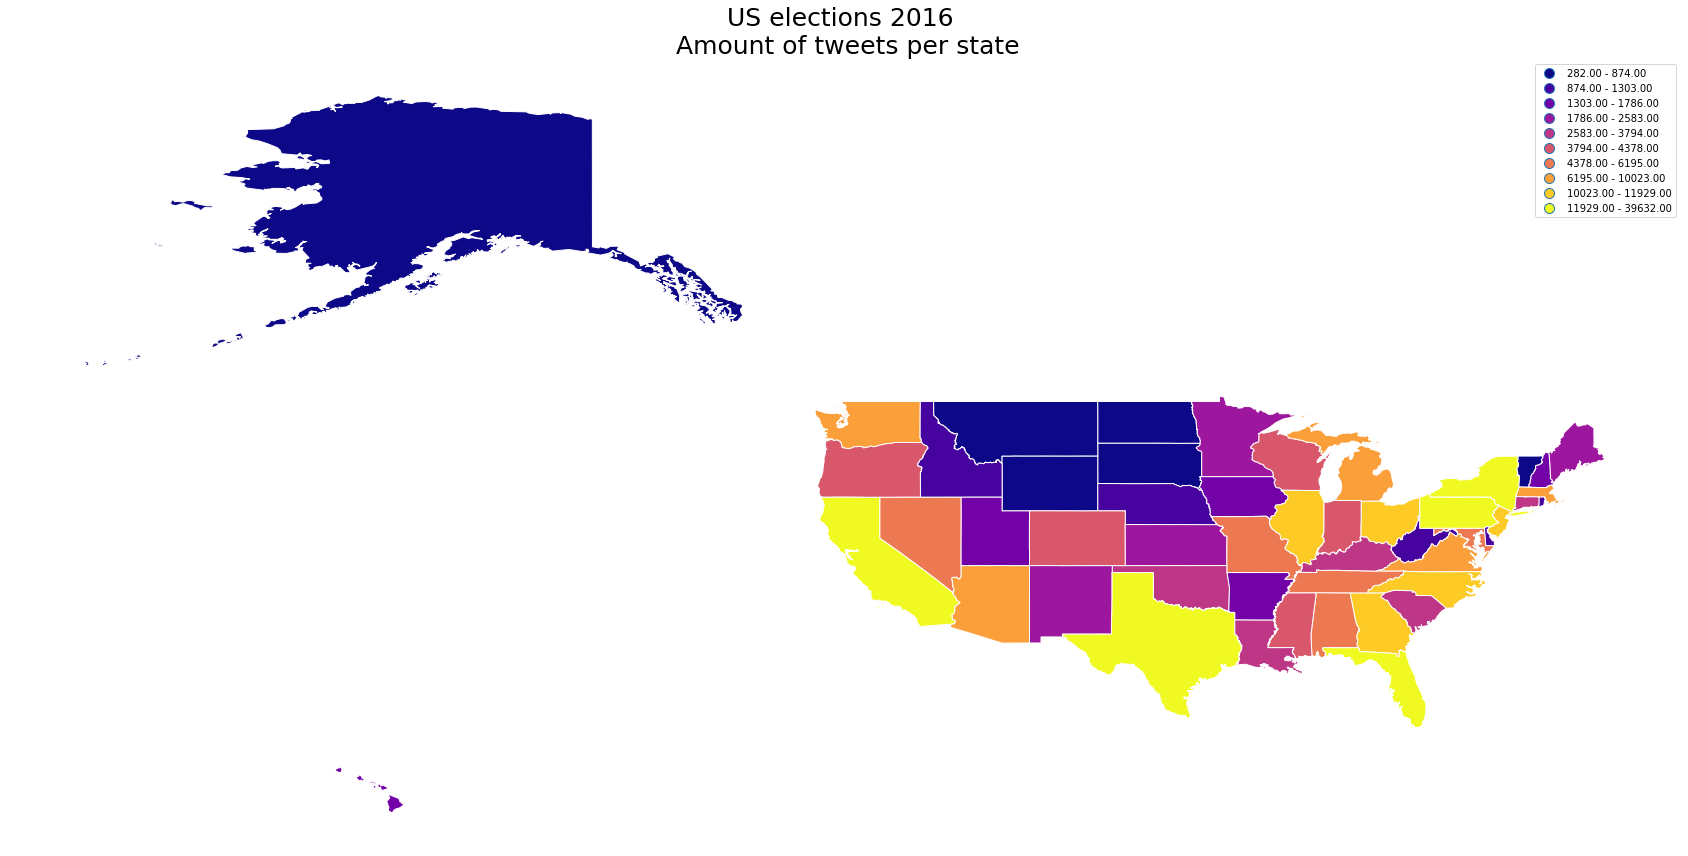

In [11]:
# Plot tweet activity
_ = state_sen_df.plot(column='count',edgecolor='white', cmap='plasma',
                        figsize=(30,20),scheme='quantiles', k=10, legend=True)
_.axis('off')
plt.title("US elections 2016 \n Amount of tweets per state", fontsize=25)
plt.savefig("tweet_density.jpg")

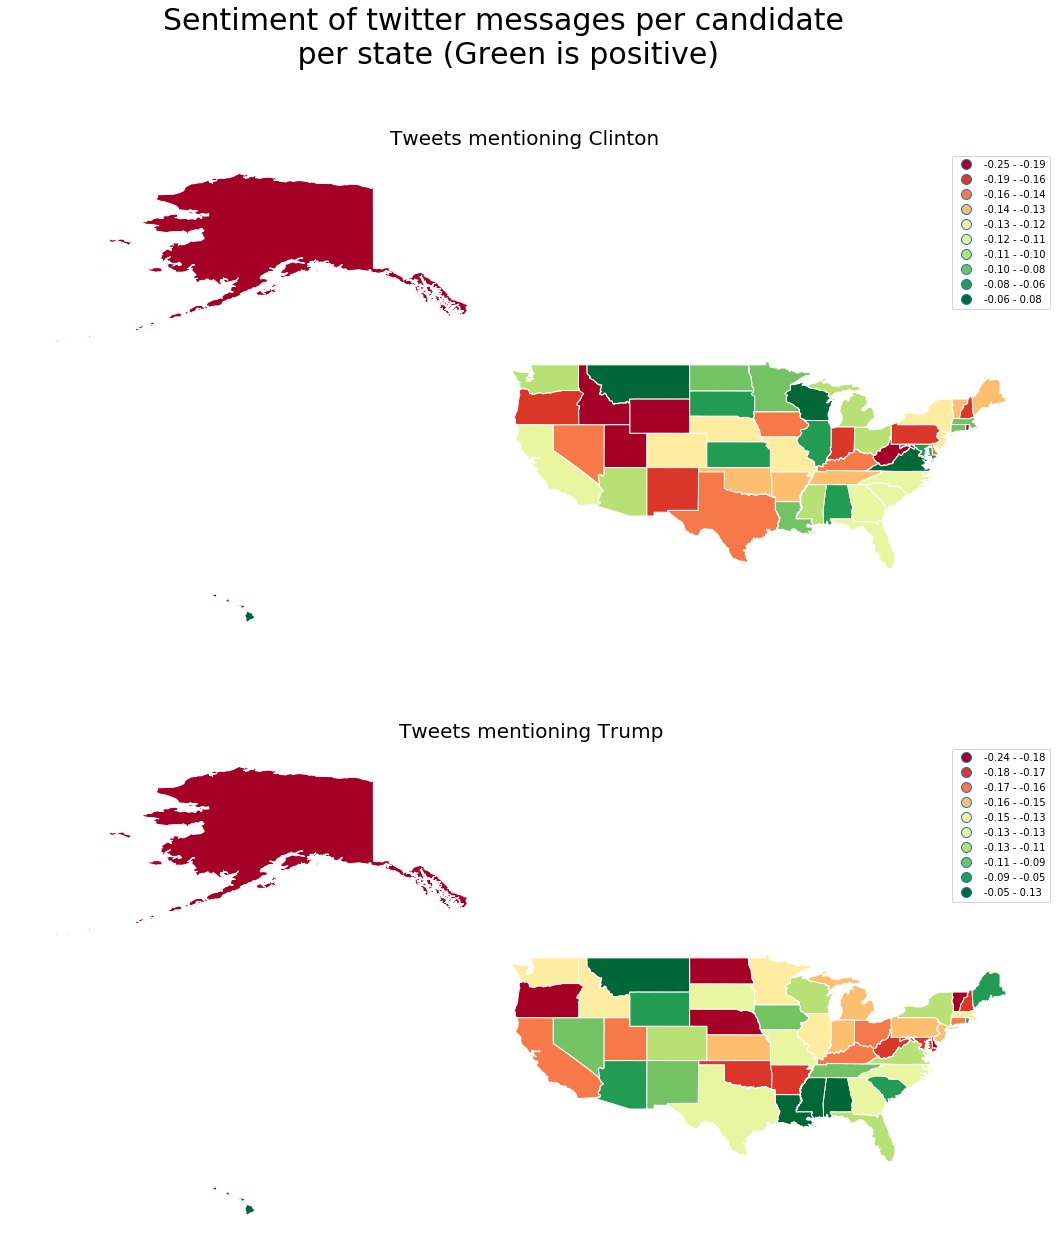

In [12]:
fig, (ax1, ax2) = plt.subplots(2, figsize=(30,20))
# Colormaps equal
fig.suptitle('Sentiment of twitter messages per candidate\n per state (Green is positive)', fontsize=30)
col_min = min(trump["trump_sen_score"].min(), clinton["clinton_sen_score"].min())
col_max = max(trump["trump_sen_score"].max(), clinton["clinton_sen_score"].max())

state_sen_df.plot(column='clinton_sen_score',edgecolor='white', cmap='RdYlGn',
                        scheme='quantiles', k=10, legend=True,
                      norm=mpl.colors.Normalize(vmin=col_min, vmax=col_max),
                         ax = ax1)
ax1.axis('off')
ax1.set_title("Tweets mentioning Clinton  ", fontsize=20)

state_sen_df.plot(column='trump_sen_score',edgecolor='white', cmap='RdYlGn',
                        scheme='quantiles', k=10, legend=True,
                     norm=mpl.colors.Normalize(vmin=col_min, vmax=col_max),
                         ax = ax2)
ax2.axis('off')
ax2.set_title("Tweets mentioning Trump", fontsize=20)
plt.savefig("Sentiment.jpg")

In [13]:
votes = pd.read_pickle(loc_votes_file).pivot_table(values='candidate_percent',
                                                   index='state', columns='candidate')
votes.head()

candidate,"Clinton, Hillary","Trump, Donald J."
state,,
Alabama,0.343579,0.620831
Alaska,0.365509,0.512815
Arizona,0.451260,0.486716
Arkansas,0.336531,0.605741
California,0.617264,0.316171


In [14]:
votes_map = state_sen_df.merge(votes, left_on = "STATE_NAME", right_on = "state", 
                               how = "right")
votes_map.head()

,STATE_NAME,geometry,count,clinton_sen_score,trump_sen_score,"Clinton, Hillary","Trump, Donald J."
0,Hawaii,(POLYGON ((-160.0738033454681 22.0041773479577...,1596,-0.037288,-0.005380,0.609808,0.294397
1,Washington,(POLYGON ((-122.4020153103835 48.2252163723779...,7520,-0.102949,-0.146232,0.525387,0.368327
2,Montana,POLYGON ((-111.4754253002074 44.70216236909688...,434,-0.038961,-0.042857,0.359352,0.564662
3,Maine,(POLYGON ((-69.77727626137293 44.0741483685119...,2583,-0.139344,-0.083532,0.463452,0.434767
4,North Dakota,POLYGON ((-98.73043728833767 45.93827137024809...,282,-0.093023,-0.193878,0.272267,0.629556


In [14]:
# votes_map["clinton_sen_scale"] = None
# votes_map["trump_sen_scale"] = None
# scaler = MinMaxScaler() 
# scaled_values = scaler.fit_transform(votes_map.loc[:, ["trump_sen_score","clinton_sen_score"]]) 
# votes_map.loc[:, ["trump_sen_scale","clinton_sen_scale"]] = scaled_values
# votes_map

In [15]:
corr_sen = abs(min(votes_map["trump_sen_score"].min(),votes_map["clinton_sen_score"].min()))
votes_map["vector_sentiment"] =  (votes_map["trump_sen_score"]+corr_sen) - (votes_map["clinton_sen_score"]+corr_sen)
votes_map["vector_vote"] =  votes_map["Trump, Donald J."] - votes_map["Clinton, Hillary"]
votes_map

,STATE_NAME,geometry,count,clinton_sen_score,trump_sen_score,"Clinton, Hillary","Trump, Donald J.",vector_sentiment,vector_vote
0,Hawaii,(POLYGON ((-160.0738033454681 22.0041773479577...,1596,-0.037288,-0.005380,0.609808,0.294397,0.031908,-0.315411
1,Washington,(POLYGON ((-122.4020153103835 48.2252163723779...,7520,-0.102949,-0.146232,0.525387,0.368327,-0.043284,-0.157060
2,Montana,POLYGON ((-111.4754253002074 44.70216236909688...,434,-0.038961,-0.042857,0.359352,0.564662,-0.003896,0.205310
3,Maine,(POLYGON ((-69.77727626137293 44.0741483685119...,2583,-0.139344,-0.083532,0.463452,0.434767,0.055812,-0.028685
4,North Dakota,POLYGON ((-98.73043728833767 45.93827137024809...,282,-0.093023,-0.193878,0.272267,0.629556,-0.100854,0.357289
5,South Dakota,POLYGON ((-102.7883842921169 42.99530336750724...,366,-0.057692,-0.129771,0.317374,0.615308,-0.072079,0.297933
6,Wyoming,POLYGON ((-104.0536152932953 41.69821836629923...,499,-0.251701,-0.062500,0.216289,0.673984,0.189201,0.457695
7,Wisconsin,(POLYGON ((-87.74855527810999 44.9616163693385...,3800,-0.042487,-0.120988,0.464538,0.472182,-0.078501,0.007643
8,Idaho,"POLYGON ((-117.026295305377 43.67903136814401,...",1185,-0.192308,-0.138603,0.274920,0.592614,0.053705,0.317694
9,Vermont,POLYGON ((-73.25806026461467 42.74605836727511...,498,-0.126437,-0.185185,0.557227,0.297594,-0.058748,-0.259634


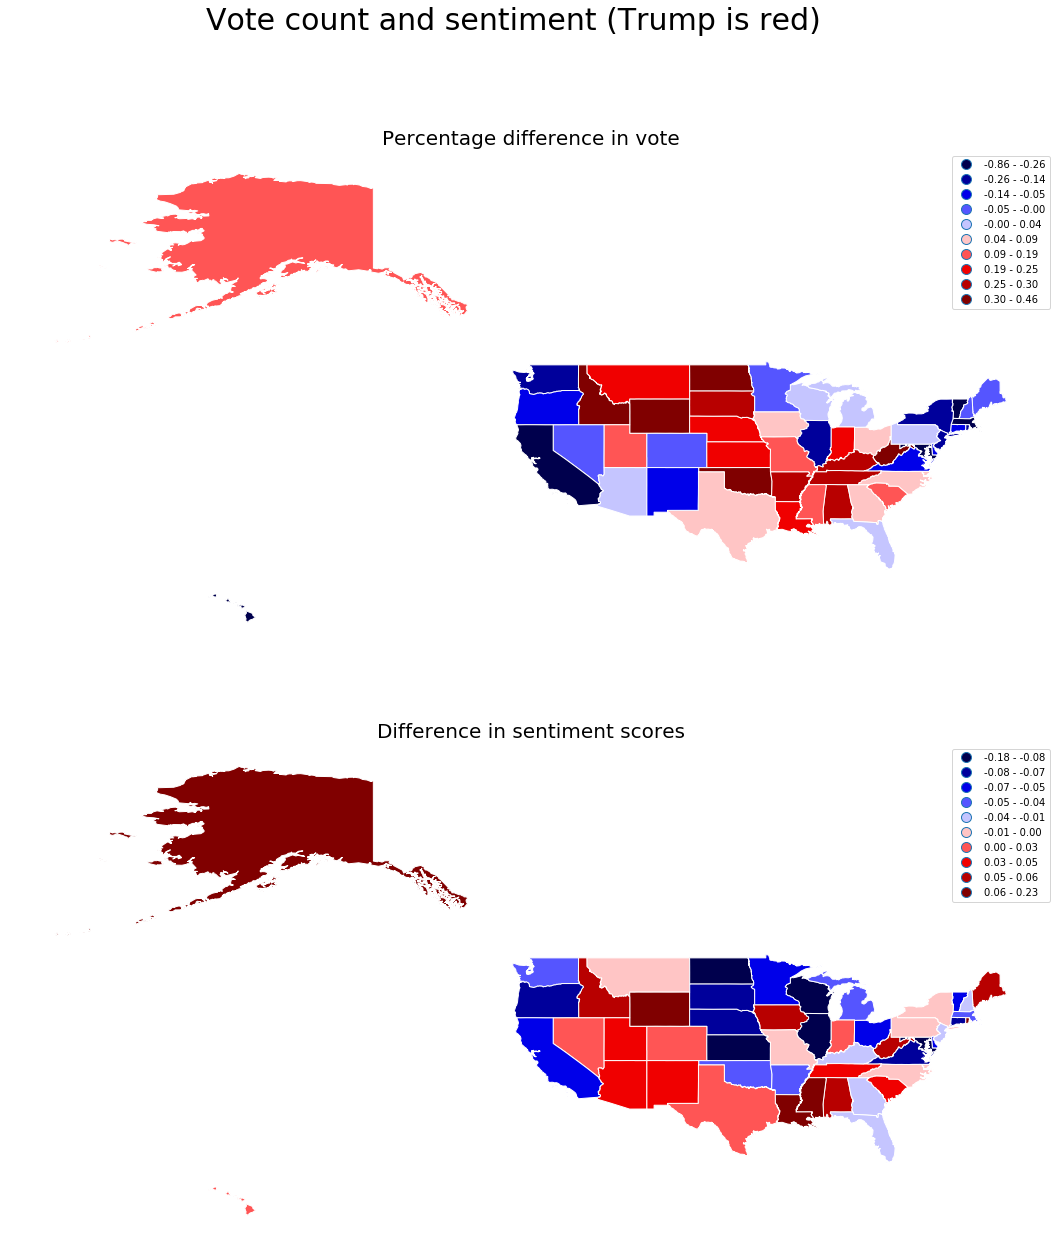

In [18]:
fig, (ax1, ax2) = plt.subplots(2, figsize=(20,20))
# Colormaps equal
fig.suptitle('Vote count and sentiment (Trump is red)', fontsize=30)

# Colormaps color
col_min = min(votes_map['vector_vote'])
col_max = max(votes_map['vector_vote'])

votes_map.plot(column='vector_vote',edgecolor='white', cmap='seismic',
                        scheme='quantiles', k=10, legend=True,
                   norm=mpl.colors.Normalize(vmin=col_min, vmax=col_max),
              ax = ax1)
ax1.axis('off')
ax1.set_title("Percentage difference in vote", fontsize=20)

# Colormaps equal
col_min = min(votes_map['vector_sentiment'])
col_max = max(votes_map['vector_sentiment'])

votes_map.plot(column='vector_sentiment',edgecolor='white', cmap='seismic',
                        scheme='quantiles', k=10, legend=True,
              ax= ax2)
ax2.axis('off')
ax2.set_title("Difference in sentiment scores", fontsize=20)
plt.savefig("Vote_sen.jpg")

In [19]:
votes_map[votes_map['vector_vote'] == col_max]

,STATE_NAME,geometry,count,clinton_sen_score,trump_sen_score,"Clinton, Hillary","Trump, Donald J.",vector_sentiment,vector_vote


In [20]:
chi_test = votes_map.loc[:,["STATE_NAME","vector_sentiment","vector_vote"]]
chi_test =chi_test.set_index("STATE_NAME", drop = True)
scaler = MinMaxScaler() 
chi_test.loc[:,["vector_sentiment","vector_vote"]] = scaler.fit_transform(chi_test.loc[:,["vector_sentiment","vector_vote"]])
chi_test

,vector_sentiment,vector_vote
STATE_NAME,,
Hawaii,0.521565,0.415125
Washington,0.337690,0.534921
Montana,0.434010,0.809064
Maine,0.580022,0.632040
North Dakota,0.196905,0.924040
South Dakota,0.267274,0.879136
Wyoming,0.906215,1.000000
Wisconsin,0.251569,0.659524
Idaho,0.574870,0.894086
